<a href="https://colab.research.google.com/github/QureshiFaisal/Autonomous_driving_tech/blob/main/Pereceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
20/20 [==============================] - 1s 4ms/step - loss: 1.7499 - accuracy: 0.5100
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6265 - accuracy: 0.6190
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.8160
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.8870
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.3476 - accuracy: 0.9080
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.9290
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.2860 - accuracy: 0.9270
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.2627 - accuracy: 0.9470
Epoch 9/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2399 - accuracy: 0.9580
Epoch 10/10
1/1 [==============================] - 0s 18ms/step
prediction is:  [[0.8768617]]


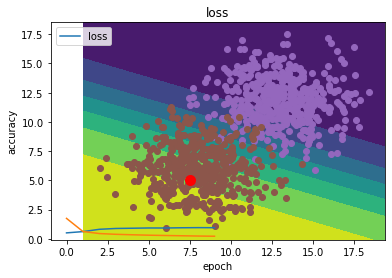

In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
%matplotlib inline
n_pts = 400
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam=Adam(lr = 0.1 )
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h=model.fit(x=X, y=y, verbose=1, batch_size=50,epochs=10, shuffle='true')
plt.plot(h.history['accuracy'])
 
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
 
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
 
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
 
 
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("prediction is: ",prediction)


Keras is an open source library that contains pre-existing tools to construct a neural network in python.
It can run over tensorflow, CNTK & theano.
We will use Keras to construct and train a simple perceptron based neural network with two input nodes and and an output node containing the sigmoid activation function.
Then we will analyse the loss and accuracy that it exhibits.

CODE lines 10 to 21

Here we declare the number of points in the upper and lower region, then we seed the randomly generated points, so that their value remains constant.
Then we create two arrays of randomly distributed points, one for top and one for bottom region. Then we take their transpose and stack them both, to make an array with all points of 2 columns and 1000 rows.
We then make an array Y of 1000 points with the first 500 being 0 (indicating the top region) and the bottom 500 being 1 (indicating the bottom region).
Then we scatter the point in the array containing all the 1000 points.

Lines 2 to 6
Sequential model is a linear stack of layers, neural networks are organised in layers containing interconnected nodes. Perceptron is the most simple neural network, it contains of two layers, the input layer that contains weights and biases and the output layer that contains the activation function.
We will then declare an instance on Sequential (line 23)
model = Sequential( )
Now we will start adding layers to the perceptron model, i.e an input layer containing 2 node (weights and biases) and an output layer containing one node.
For that we will first import the Dense class, which connects every layer with its preceding layer.
We will pass '1' as an argument to the Dense() function as we have only one node producing a single output. The second argument is the number of input nodes and the third argument is the type of activation function.
Now, to compile Keras code we need to make use of an optimiser, so we will import an optimiser called Adam.
Adam is one of many optimisation algorithms.
We used the vanilla gradient algorithm early to calculate the gradient
gradient = (points.T * (p-y)) * (alpha / m)
line_parameters = line_parameters - gradients
This is known as batch gradient descent, it uses the entire data-set to compute the gradient.
The Adam algorithm uses stochastic gradient descent which is computationally much more efficient, as it computes the gradient descent through a single sample.
The Adam algorithm is a combination of two other extensions stochastic gradient descent i.e Adagrad and RMSprop.
In our vanilla gradient descent computation we used a small learning rate as 'alpha' which remains constant even with the change in the values of inputs. However, in scholastic gradient descent the learning rate is adjusted in accordance to the change in input values to reduce the error.
We need to declare an instance of Adam and pass the initial learning rate at which the error will be minimised.
Adam = Adam(lr=0.1).
Now to configure the learning process we have to invoke the compile( ) function.
Inside this function we need to pass as arguments what kind of optimiser are we going to use (adam), the form of cross entropy (since we are dealing with only two inputs we expect a binary outcome of 1 or 0), metrics is a measure whose results are not used to train the model but are used to judge the performance art every epoch used to what kind of error function (sigmoid).
To fit the linear model to our data we will use the fit( ) function.
We will first pass the input data (x=X i.e weights) and (y=y i.e biases). We will then declare verbosity, verbose =1, what that will do is display a progress bar of information relating to the performance of our model at each epoch. An epoch refers to whenever it iterates over the entire data-set of points and labels to try and separate our data in distinct classes based on their labels. However one epoch is too big to feed to the computer all at once, so we need to divide it into several small batches.
shuffle actually shuffles your training data, as when you are dealing with static data your training model might get stuck at the local minimum, thus shifting the data gets it out of that local minimum mode so that it reach the global minimum.

CODE lines 27-32
We will plot the accuracy of the neural network per epoch on a chart.

After training the neural network we will plot a linear model that will precisely separate our data set and classify it.
To do that we will define a function 'plot_decision_boundary', which will accept three arguments, the two inputs nodes and the model that we trained.
To plot the linear model we will first create a grid that spans all points equally.
x_span is going to defined as 50 equally spaced points, and so will be the y_span.
In the x_span we will index all the horizontal co-ordinates that are in the first column of the stacked array of all points 'X'. x_span will be an array of 50 equally spaced points from the minimum to maximum value along the X axis, having 1 row and 50 columns.
In the y_span we will index all the vertical co-ordinates that are in the second column of the stacked array of all points 'X'. y_span will be an array of 50 equally spaced points from the minimum to maximum value along the Y axis, having 1 row and 50 columns.
Then we will add some tolerance by subtracting 1 from the minimum values and adding 1 to the maximum values.
This will space out our grids and make the chart more visually appealing.
Now we will use the mesh grid function which returns co-ordinate matrices from the input of co-ordinate vectors, In our case, it will return a two dimensional array of 5050. for both the x_span and y_span.
xx will be an array of 50 rows and 50 columns, the additional 50 rows will a copy of the first row itself.
It will do the same for y_span, however the newly added elements this time will be in the form of 50 columns. The newly added column will be a copy of the initial column.
Because, in a 5050 grid where every y co-ordinate will have 50 corresponding x co-ordinates.
But xx and yy are 2D array so we will use ravel( ) to flatten them and convert them into a one dimensional array.

Now, we will concatenate the xx_ and yy_ flattened arrays column wise to create our grid, such that for every y co-ordinate there will be 50 x co-ordinates.
Then we will pass this grid into the predict( ) function that returns the probability of each point, the points with probabilities close to zero will be in the top region and those close to 1 will be in the bottom.

Now we will reshape the result of this function into a 50*50 graph so that it is the same as our grid-spans.
Now we will use the contourf( ) function to plot the contour.
Thus far, we have trained a neural network based on previously classified data-sets to come up with a linear model that classifies the data.
Now we will pass new data to the neural network, i.e we will ask it to plot a point with co-ordinates x= 7.5 and y = 5
